# <font  color = 'white' >  Importing the libraries </font>

In [12]:
!pip install umap-learn


# adicionando ao github

In [13]:
import re 

import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn import cluster as c
from sklearn import metrics as m
import numpy as np




# <font  color = 'white' >  Load dataset </font>

In [14]:
import os
import pandas as pd

os.chdir('C:\\Users\\basfe\\DataspellProjects\\Learning Data Science  - Will\\Data')
dados = pd.read_csv('Ecommerce.csv', encoding='latin-1')
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [15]:
# dropando colunas que não serão utilizadas

dados.drop(columns=['Unnamed: 8'], axis=1, inplace=True)

In [16]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font  color = 'red' > 1. Descrição dos Dados

In [17]:
dados1 = dados.copy()

### <font  color = 'white' > 1.1. Rename columns

In [18]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id',
            'country']
dados1.columns = cols_new

### <font  color = 'white' > 1.2. Data Dimensions

In [19]:
linhas, colunas = dados1.shape

print('O dataset possui {} linhas e {} colunas'.format(linhas, colunas))

O dataset possui 541909 linhas e 8 colunas


###  <font  color = 'white' > 1.3. Data Types

In [20]:
dados1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.3. <font  color = 'white' > Check NA

In [21]:
dados1.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### <font  color = 'white' > 1.4. Replace NA


In [22]:
# remova na
dados1 = dados1.dropna(subset=['description', 'customer_id'])
print('Removed data: {:.2f}'.format(1 - (dados1.shape[0] / dados.shape[0])))

Removed data: 0.25


In [23]:
dados1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### <font  color = 'white' > 1.5. Change Data Types

In [24]:
# invoice date
dados1['invoice_date'] = pd.to_datetime(dados1['invoice_date'], format='%d-%b-%y')

# customer id
dados1['customer_id'] = dados1['customer_id'].astype(int)

dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [25]:
dados1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

###  <font  color = 'white' > 1.6. Describe Statistical

In [26]:
num_attributes = dados1.select_dtypes( include=['int32','int64','float64'] ) # seleciona apenas atributos numéricos
cat_attributes = dados1.select_dtypes( exclude=['int32','int64', 'float64', 'datetime64[ns]'] ) # seleciona apenas atributos categóricos

#### 1.6.1. Numerical Attributs

In [27]:
# central tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T


# concatenate

metrics = pd.concat( [ct1, ct2, d1, d2, d3,d4, d5, d6] ).T.reset_index()
metrics.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attributes,mean,median,std,min,max,range,skew,kurtosis
0,quantity,12.061303,5.00,248.693064,-80995.0,80995.0,161990.0,0.182663,94317.563673
1,unit_price,3.460471,1.95,69.315077,0.0,38970.0,38970.0,452.219019,246924.542988
2,customer_id,15287.690570,15152.00,1713.598197,12346.0,18287.0,5941.0,0.029835,-1.179982


##### 1.6.1.1. Numerical Attributes - Investigating </font>

1. Quantity negativa ( pode ser devolução )


2. Preço unitário igual a zero ( pode ser promoção? )

#### 1.6.1. Categorical Attributes


In [28]:
# frequency
cat_attributes.apply( lambda x: x.unique().shape[0] )





invoice_no     22190
stock_code      3684
description     3896
country           37
dtype: int64

In [29]:
# problema: temos 'invoice_no' com letras e números
# cat_atributes['invoice_no'].astype(int)

df_letter_invoices = dados1.loc[dados1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices.head()

print( 'Total number of invoices: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )



Total number of invoices: 8905
Total number of negative quantity: 8905


In [30]:
# stock code

# check stock codes only characters
dados1.loc[dados1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Acão:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

# <font  color = 'red' > 3. Filtragem de Variáveis

In [31]:
dados2 = dados1.copy()

In [32]:
dados2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

# <font  color = 'red' > 2. Feature Engineering


In [33]:
#dados2 = dados1.copy()

### <font  color = 'white' > 2.1. Feature Creation

In [34]:
dados2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [35]:
# data reference
dados2_ref = dados2.drop(['invoice_no', 'stock_code', 'description',
                          'quantity', 'invoice_date', 'unit_price',
                          'country'], axis=1).drop_duplicates(ignore_index=True)

# Gross Revenue ( Faturamento ) quantity * price
dados2['gross_revenue'] = dados2['quantity'] * dados2['unit_price']

# Monetary
dados2_monetary = dados2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
dados2_ref = pd.merge(dados2_ref, dados2_monetary, on='customer_id', how='left')

# Recency - Last day purchase
dados2_recency = dados2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
dados2_recency['recency_days'] = (dados2['invoice_date'].max() - dados2_recency['invoice_date']).dt.days
dados2_recency = dados2_recency[['customer_id', 'recency_days']].copy()
dados2_ref = pd.merge(dados2_ref, dados2_recency, on='customer_id', how='left')

# Frequency
dados2_freq = dados2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
dados2_ref = pd.merge(dados2_ref, dados2_freq, on='customer_id', how='left')

# Avg Ticket
dados2_avg_ticket = dados2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(
    columns={'gross_revenue': 'avg_ticket'})
dados2_ref = pd.merge(dados2_ref, dados2_avg_ticket, on='customer_id', how='left')

In [36]:
dados2_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# <font  color = 'red' > 4. EDA (Exploratory Data Analysis)

# <font  color = 'red' > 5. Data Preparation

# <font  color = 'red' > 6. Feature Selection

# <font  color = 'red' > 7. Hyperparameter Fine Tuning

In [37]:
dados_hyper = dados2_ref.copy()
dados_hyper.drop('customer_id', axis=1, inplace=True)

### <font  color = 'white' > 7.1. Within-Cluster Sum of Square (WSS)

In [38]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [39]:
clusters = [2, 3, 4, 5, 6, 7]

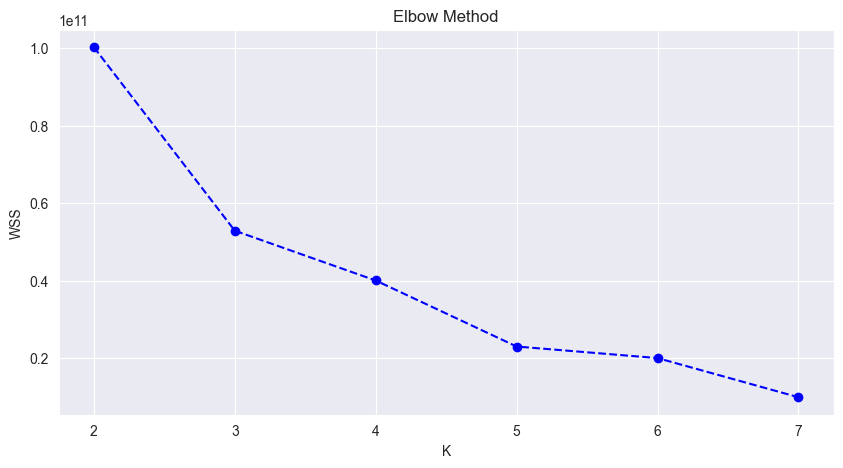

In [40]:
# root mode

wss = []

for k in clusters:
    kmeans = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)
    kmeans.fit(dados_hyper)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

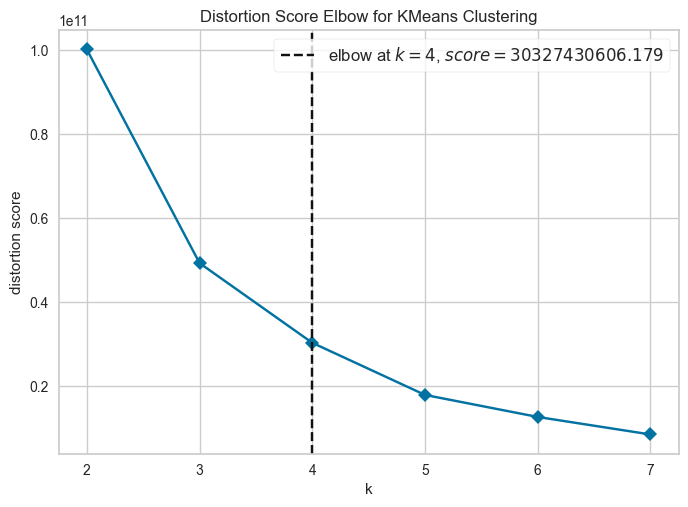

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# using yellowbrick

from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(dados_hyper)
kmeans.show()

### <font  color = 'white' > 7.2. Silhouette Score

C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

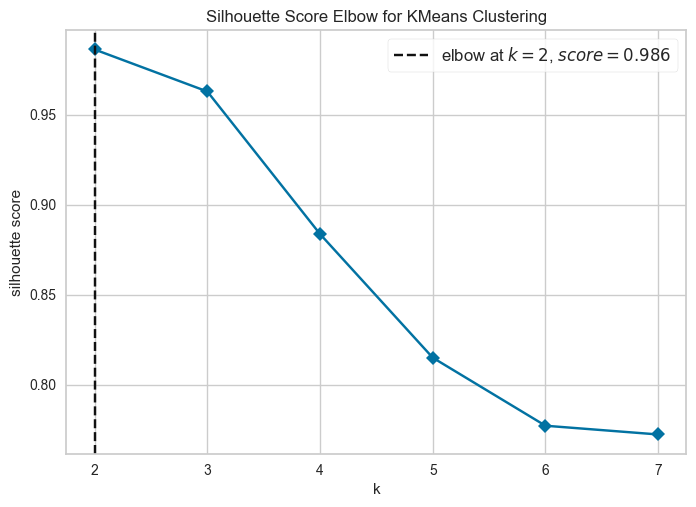

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(dados_hyper)
kmeans.show()

### <font  color = 'white' > 7.3. Silhouette Analysis

C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with

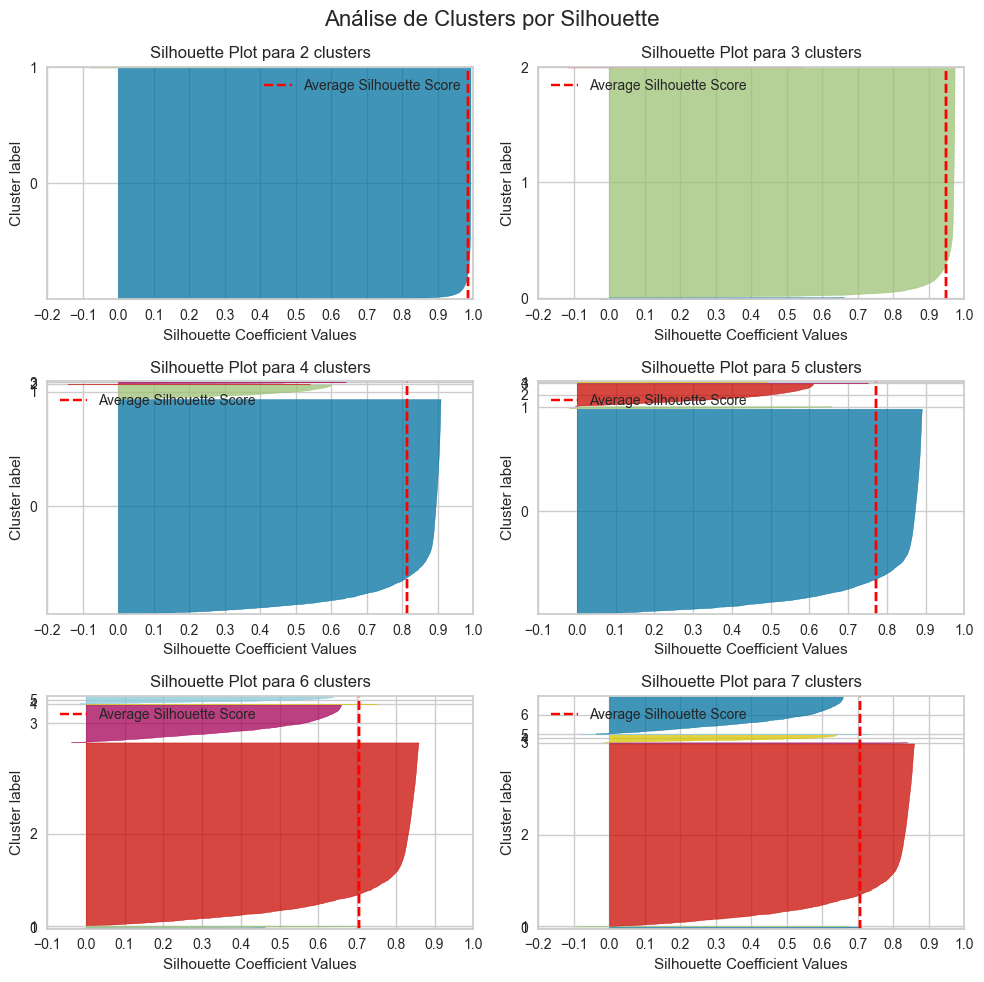

In [43]:
# model visualization
from yellowbrick.cluster import SilhouetteVisualizer

# Criação dos subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# silhouette
for idx, k in enumerate(clusters):
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(dados_hyper)
    visualizer.finalize()

    # Configuração da fonte no gráfico Silhouette

    visualizer.set_title(f"Silhouette Plot para {k} clusters")
    visualizer.ax.set_xlabel("Silhouette Coefficient Values")
    visualizer.ax.set_ylabel("Cluster label")

    visualizer.fit(dados_hyper)

fig.suptitle('Análise de Clusters por Silhouette', fontsize=16)

plt.tight_layout()
plt.show()











# <font  color = 'red' > 8. Model Training


In [44]:
# model definition
k = 4
kmeans = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)

# model training
kmeans.fit(dados_hyper)

# model prediction
labels = kmeans.labels_

# model evaluation
wss = kmeans.inertia_
ss = m.silhouette_score(dados_hyper, labels, metric='euclidean')

print('WSS: {:.2f}'.format(wss))
print('SS: {:.2f}'.format(ss))




WSS: 40056254626.30
SS: 0.81


# <font  color = 'red' > 9. Cluster Analysis


In [45]:
dados2_ref['cluster'] = labels
dados2_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,1
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,1
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


## <font  color = 'white' > 9.1. Visualization Inspection

In [46]:
#fig = px.scatter_3d( dados2_ref, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
#fig.show()

C:\Users\basfe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


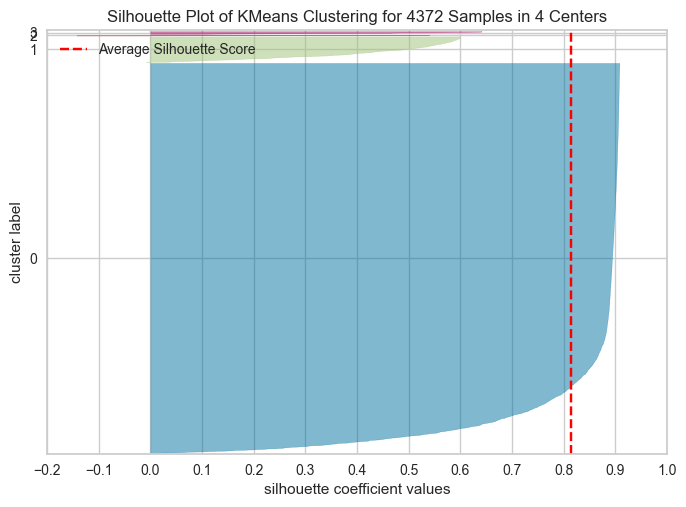

In [47]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(dados_hyper)
visualizer.finalize()

#### <font  color = 'white' > 9.1.2. 2D Plot

In [48]:
dados_viz = dados2_ref.copy()
dados_viz['cluster'] = labels
dados_viz.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,1
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,1
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


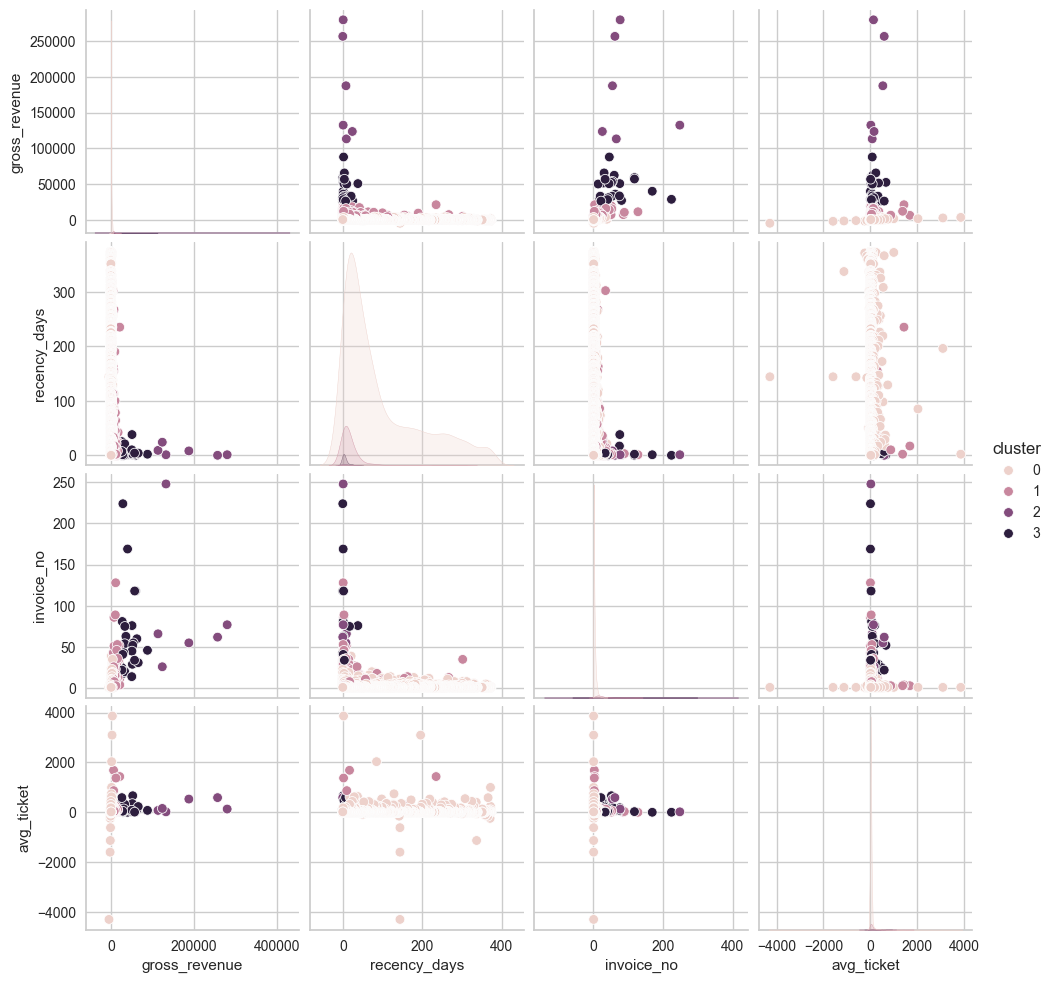

In [49]:
dados_viz = dados_viz.drop('customer_id', axis=1)

sns.pairplot(hue='cluster', data=dados_viz)


#

    # Gráfico de Dispersão: Recency Days vs. Invoice No com Clusters e Centróides
    sns.scatterplot(x='recency_days', y='invoice_no', hue='cluster', data=dados2_ref)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='r', s=250)
    plt.title('Recency Days vs. Invoice No with Clusters and Centroids')
    plt.show()
    
    # Gráfico de Dispersão: Recency Days vs. Gross Revenue com Clusters e Centróides
    sns.scatterplot(x='recency_days', y='gross_revenue', hue='cluster', data=dados2_ref)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='*', c='r', s=250)
    plt.title('Recency Days vs. Gross Revenue with Clusters and Centroids')
    plt.show()
    
    # Gráfico de Dispersão: Invoice No vs. Gross Revenue com Clusters e Centróides
    sns.scatterplot(x='invoice_no', y='gross_revenue', hue='cluster', data=dados2_ref)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='*', c='r', s=250)
    plt.title('Invoice No vs. Gross Revenue with Clusters and Centroids')
    plt.show()
    
    # Matriz de Dispersão com Clusters
    sns.pairplot(dados2_ref, hue='cluster')
    plt.suptitle('Pairplot of Variables with Clusters')
    plt.show()
    
    # Mapa de Calor da Correlação entre Variáveis
    sns.heatmap(dados2_ref.corr(), annot=True, cmap='Blues')
    plt.title('Heatmap of Variable Correlation')
    plt.show()
    
    # Boxplot: Distribuição de Recency Days por Cluster
    sns.boxplot(x='cluster', y='recency_days', data=dados2_ref)
    plt.title('Distribution of Recency Days by Cluster')
    plt.show()
    
    # Boxplot: Distribuição de Invoice No por Cluster
    sns.boxplot(x='cluster', y='invoice_no', data=dados2_ref)
    plt.title('Distribution of Invoice No by Cluster')
    plt.show()
    
    # Boxplot: Distribuição de Gross Revenue por Cluster
    sns.boxplot(x='cluster', y='gross_revenue', data=dados2_ref)
    plt.title('Distribution of Gross Revenue by Cluster')
    plt.show()
    
    # Countplot: Distribuição dos Clusters
    sns.countplot(x='cluster', data=dados2_ref)
    plt.title('Cluster Distribution')
    plt.show()
    
    # Barplot: Média de Recency Days por Cluster
    sns.barplot(x='cluster', y='recency_days', data=dados2_ref)
    plt.title('Average Recency Days per Cluster')
    plt.show()
    
    # Barplot: Média de Invoice No por Cluster
    sns.barplot(x='cluster', y='invoice_no', data=dados2_ref)
    plt.title('Average Invoice No per Cluster')
    plt.show()
    
    # Barplot: Média de Gross Revenue por Cluster
    sns.barplot(x='cluster', y='gross_revenue', data=dados2_ref)
    plt.title('Average Gross Revenue per Cluster')
    plt.show() 

#### <font  color = 'white' > 9.1.2. UNMAP

C:\Users\basfe\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

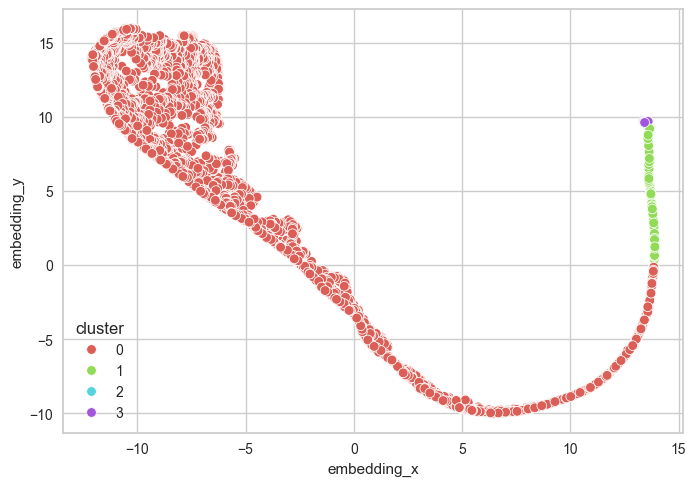

In [50]:
reducer = umap.UMAP(n_neighbors=80, random_state=42)
embedding = reducer.fit_transform(dados_hyper)

# embedding
dados_viz['embedding_x'] = embedding[:, 0]
dados_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls', n_colors=len(dados_viz['cluster'].unique())),
                data=dados_viz)

## <font  color = 'white' > 9.2. Cluster Profile


In [51]:
# Number of customer
df_cluster = dados2_ref[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = dados2_ref[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = dados2_ref[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Avg invoice_no
df_invoice_no = dados2_ref[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_invoice_no, how='inner', on='cluster' )

# Avg Ticket
df_ticket = dados2_ref[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.115279,946.696250,96.969295,3.641120,25.359654
1,1,267,6.107045,8089.028652,20.280899,19.528090,62.783157
2,2,6,0.137237,182181.981667,7.166667,89.000000,253.626345
3,3,28,0.640439,42614.387143,6.178571,57.821429,162.862605


# <font  color = 'red' > 10. Deploy to Production
